In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "kmeans_dataset.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns permanently
df.drop(['Customer_ID', 'Age'], axis=1, inplace=True)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Normalize numerical features using Z-score normalization
columns_to_normalize = ['Annual_Income', 'Spending_Score', 'Website_Visits', 
                        'Product_Categories_Purchased', 'Total_Purchase_Amount', 
                        'Average_Session_Duration', 'Return_Rate', 'Discount_Usage']

for col in columns_to_normalize:
    df[col] = (df[col] - df[col].mean()) / df[col].std()  # Z-score formula

# Convert DataFrame to NumPy array
data = df.values
df_clean=data
df.head()


,Annual_Income,Spending_Score,Website_Visits,Product_Categories_Purchased,Total_Purchase_Amount,Average_Session_Duration,Return_Rate,Discount_Usage
0,4.234177,-0.821929,-1.513072,0.572904,4.343030e+00,0.140458,-0.027436,0.636563
1,-0.085797,0.453294,1.298046,1.294565,-2.173814e-16,-0.821808,0.712317,-1.181115
2,1.047072,-1.601233,-1.044552,0.000000,-1.192879e+00,-0.400817,1.742863,0.270431
3,0.000000,1.409712,-0.224643,1.655395,-1.203634e+00,0.200600,-1.311895,1.015321
4,0.767677,-0.255164,0.478137,-0.870417,7.976250e-01,-0.160250,-0.803360,0.031633


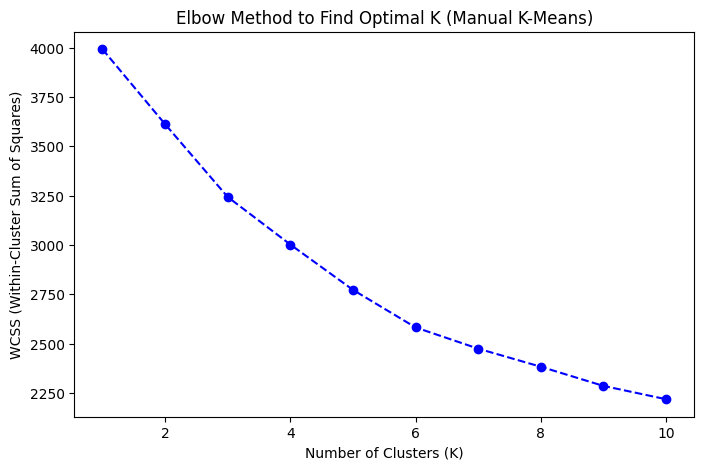

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement K-Means clustering
def kmeans_manual(data, k, max_iters=100):
    np.random.seed(42)  # For reproducibility
    # Step 1: Randomly initialize k cluster centers
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Step 2: Assign each data point to the closest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)  # Get the closest centroid
            clusters[cluster_idx].append(point)
        
        # Step 3: Compute new centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])
        
        # Stop if centroids do not change
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    # Compute WCSS (Within-Cluster Sum of Squares)
    wcss = sum(sum(euclidean_distance(point, centroids[idx])**2 for point in cluster) for idx, cluster in enumerate(clusters))
    return wcss

# Compute WCSS for different values of K
K_range = range(1, 11)
wcss_values = [kmeans_manual(data, k) for k in K_range]

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Find Optimal K (Manual K-Means)')
plt.show()


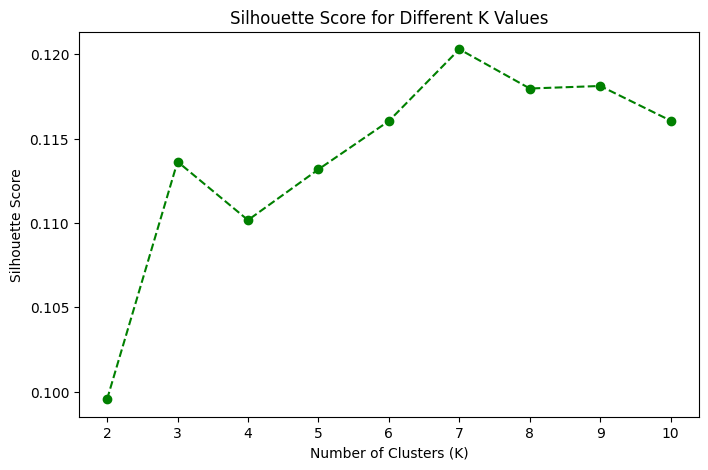

In [146]:
from sklearn.metrics import silhouette_score

silhouette_scores = []  # Store silhouette scores for different K values

# Try different values of K (starting from 2 because silhouette score isn't defined for K=1)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Create KMeans model
    cluster_labels = kmeans.fit_predict(data)  # Get cluster labels
    score = silhouette_score(data, cluster_labels)  # Calculate silhouette score
    silhouette_scores.append(score)

# Plot the Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()


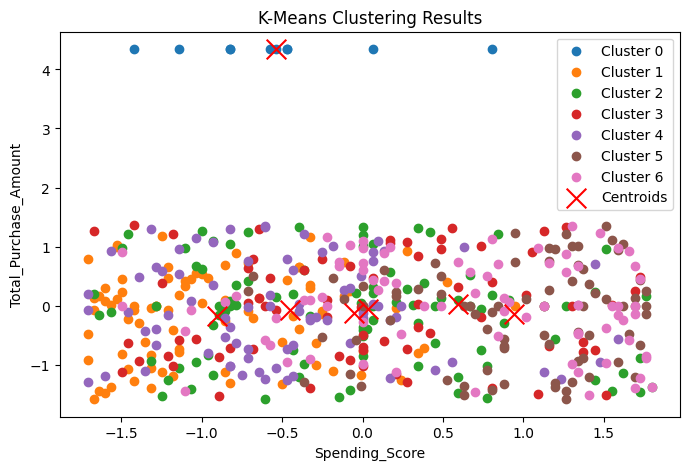

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement K-Means clustering
def kmeans_manual(data, k, max_iters=100):
    np.random.seed(42)  # For reproducibility
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        labels = np.zeros(data.shape[0], dtype=int)
        
        # Assign points to the nearest cluster
        for idx, point in enumerate(data):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
            labels[idx] = cluster_idx  # Store cluster label
        
        # Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids  # Return both labels and centroids

# Apply K-Means clustering
k = 7  # Define number of clusters
labels, centroids = kmeans_manual(data, k)

# Extract relevant features for visualization
x_feature = "Spending_Score"
y_feature = "Total_Purchase_Amount"

# Get indices of selected features
x_idx = list(df).index(x_feature)
y_idx = list(df).index(y_feature)

# Convert data to NumPy array if needed
data = np.array(data)

# Visualize clustering results
plt.figure(figsize=(8, 5))
for i in range(k):
    cluster_points = data[labels == i]  # Filter points belonging to cluster i
    plt.scatter(cluster_points[:, x_idx], cluster_points[:, y_idx], label=f'Cluster {i}')

plt.scatter(centroids[:, x_idx], centroids[:, y_idx], color='red', marker='x', s=200, label='Centroids')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()



In [148]:
import pandas as pd
import numpy as np

# Convert dataset to NumPy array if not already done
data_np = np.array(data)

# Number of clusters
k = 7  

# Apply K-Means clustering
labels, centroids = kmeans_manual(data_np, k)

# Assign cluster labels to the dataset (assuming 'data' was originally a DataFrame)
df["Cluster"] = labels  

# Compute average feature values for each cluster
cluster_summary = df.groupby("Cluster").mean()

# Display the cluster interpretation
print("Cluster Interpretation:\n")
cluster_summary


Cluster Interpretation:



,Annual_Income,Spending_Score,Website_Visits,Product_Categories_Purchased,Total_Purchase_Amount,Average_Session_Duration,Return_Rate,Discount_Usage
Cluster,,,,,,,,
0,4.234177,-0.538547,-0.201217,0.103825,4.343030,0.098359,0.288963,-0.056733
1,-0.262749,-0.905872,0.754282,0.517881,-0.165703,0.625544,-0.395953,0.041948
2,-0.022396,-0.055169,0.555590,-0.313931,-0.124983,-0.606525,0.633952,-1.040381
3,-0.066508,0.034215,-0.861705,-0.702396,-0.055418,-0.239595,-0.826055,-0.346945
4,-0.139864,-0.454403,-0.472511,0.185619,-0.064399,-0.924774,0.523142,0.857346
5,0.065295,0.940539,-0.384833,1.158462,-0.135737,0.326640,-0.405225,0.092400
6,-0.085718,0.593755,0.203384,-0.931703,0.029107,0.835085,0.269152,0.505887


In [149]:
import pandas as pd
import numpy as np

# Function to remove outliers using IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)  # 25th percentile
    Q3 = df.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_cleaned

# Apply outlier removal
df_cleaned = remove_outliers(df)

# Convert cleaned data to NumPy array for clustering
data_cleaned = np.array(df_cleaned.drop(columns=["Cluster"], errors='ignore'))


In [150]:
df_cleaned.head()

,Annual_Income,Spending_Score,Website_Visits,Product_Categories_Purchased,Total_Purchase_Amount,Average_Session_Duration,Return_Rate,Discount_Usage,Cluster
1,-0.085797,0.453294,1.298046,1.294565,-2.173814e-16,-0.821808,0.712317,-1.181115,2
2,1.047072,-1.601233,-1.044552,0.000000,-1.192879e+00,-0.400817,1.742863,0.270431,4
3,0.000000,1.409712,-0.224643,1.655395,-1.203634e+00,0.200600,-1.311895,1.015321,5
4,0.767677,-0.255164,0.478137,-0.870417,7.976250e-01,-0.160250,-0.803360,0.031633,3
5,-1.410997,0.000000,1.532306,0.572904,-7.615789e-01,1.643999,-0.378516,-1.724362,1


In [151]:
# Run K-Means on original data
labels_original, centroids_original = kmeans_manual(np.array(df.drop(columns=["Cluster"], errors='ignore')), k)

# Run K-Means on cleaned data
labels_cleaned, centroids_cleaned = kmeans_manual(data_cleaned, k)

# Assign cluster labels to both datasets
df["Cluster_Original"] = labels_original
df_cleaned["Cluster_Cleaned"] = labels_cleaned

# Compute average feature values for both cases
cluster_summary_original = df.groupby("Cluster_Original").mean()
cluster_summary_cleaned = df_cleaned.groupby("Cluster_Cleaned").mean()

print("Cluster Summary Before Outlier Removal:\n", cluster_summary_original)
print("\nCluster Summary After Outlier Removal:\n", cluster_summary_cleaned)


Cluster Summary Before Outlier Removal:
                   Annual_Income  Spending_Score  Website_Visits  \
Cluster_Original                                                  
0                      4.234177       -0.538547       -0.201217   
1                     -0.262749       -0.905872        0.754282   
2                     -0.022396       -0.055169        0.555590   
3                     -0.066508        0.034215       -0.861705   
4                     -0.139864       -0.454403       -0.472511   
5                      0.065295        0.940539       -0.384833   
6                     -0.085718        0.593755        0.203384   

                  Product_Categories_Purchased  Total_Purchase_Amount  \
Cluster_Original                                                        
0                                     0.103825               4.343030   
1                                     0.517881              -0.165703   
2                                    -0.313931              -0.

C:\Users\Sami\AppData\Local\Temp\ipykernel_10688\166716932.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Cluster_Cleaned"] = labels_cleaned


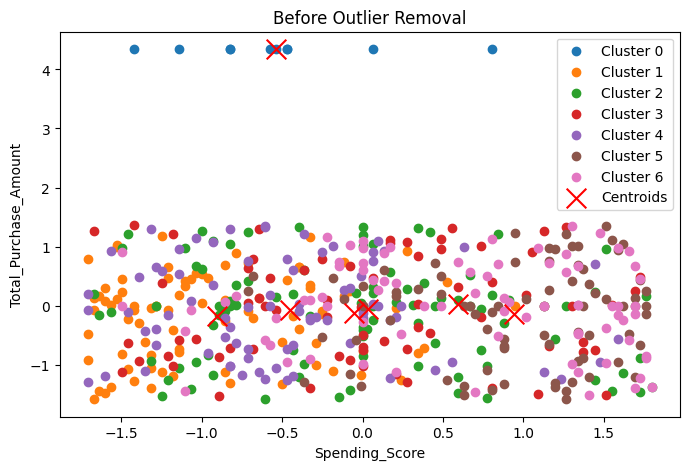

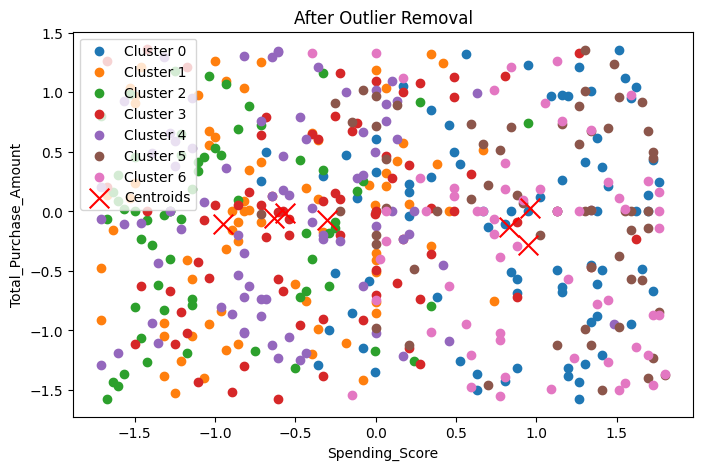

In [152]:
import matplotlib.pyplot as plt

x_feature = "Spending_Score"
y_feature = "Total_Purchase_Amount"

x_idx = list(df).index(x_feature)
y_idx = list(df).index(y_feature)

# Plot Before Outlier Removal
plt.figure(figsize=(8, 5))
for i in range(k):
    cluster_points = np.array(df[df["Cluster_Original"] == i].drop(columns=["Cluster_Original"]))
    plt.scatter(cluster_points[:, x_idx], cluster_points[:, y_idx], label=f'Cluster {i}')
plt.scatter(centroids_original[:, x_idx], centroids_original[:, y_idx], color='red', marker='x', s=200, label='Centroids')
plt.title("Before Outlier Removal")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.show()

# Plot After Outlier Removal
plt.figure(figsize=(8, 5))
for i in range(k):
    cluster_points = np.array(df_cleaned[df_cleaned["Cluster_Cleaned"] == i].drop(columns=["Cluster_Cleaned"]))
    plt.scatter(cluster_points[:, x_idx], cluster_points[:, y_idx], label=f'Cluster {i}')
plt.scatter(centroids_cleaned[:, x_idx], centroids_cleaned[:, y_idx], color='red', marker='x', s=200, label='Centroids')
plt.title("After Outlier Removal")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.show()


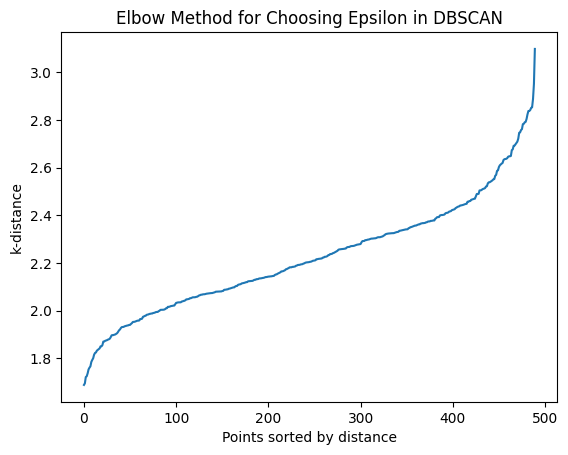

In [153]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

min_samples = 16  # Based on features (2 * 8)

# Compute nearest neighbor distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data_cleaned)  # Assuming you removed outliers
distances, indices = neighbors_fit.kneighbors(data_cleaned)

# Sort and plot distances of the kth nearest neighbors
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance")
plt.title("Elbow Method for Choosing Epsilon in DBSCAN")
plt.show()


In [168]:
import pandas as pd
from sklearn.cluster import DBSCAN

# If df_clean is a NumPy array, convert it back to a DataFrame
if isinstance(df_clean, np.ndarray):
    df_clean = pd.DataFrame(df_clean, columns=["Annual_Income", "Spending_Score", 
                                               "Website_Visits", "Product_Categories_Purchased",
                                               "Total_Purchase_Amount", "Average_Session_Duration",
                                               "Return_Rate", "Discount_Usage"])

# Convert DataFrame to NumPy array (for clustering)
data = df_clean.to_numpy()

# Define DBSCAN parameters
eps_value = 2.5  
min_samples = 16  

# Fit DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
df_clean["DBSCAN_Cluster"] = dbscan.fit_predict(data)  # ✅ Now it works

# Extract cluster labels
dbscan_labels = df_clean["DBSCAN_Cluster"]

print("DBSCAN clustering applied successfully!")


DBSCAN clustering applied successfully!


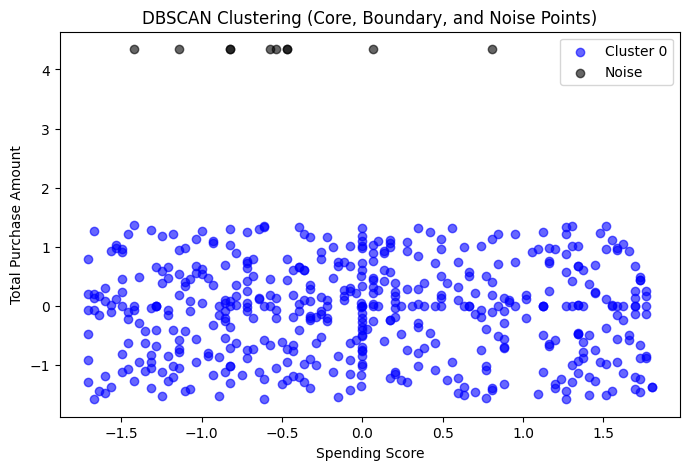

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Extract DBSCAN labels
labels = df_clean["DBSCAN_Cluster"].values
unique_labels = set(labels)

# Define colors for visualization
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(8, 5))

for label in unique_labels:
    if label == -1:
        # Noise points (black color)
        color = 'k'
        label_name = "Noise"
    else:
        # Assign color to clusters
        color = colors[label % len(colors)]
        label_name = f"Cluster {label}"

    # Extract points belonging to the cluster
    cluster_points = df_clean[labels == label]
    plt.scatter(cluster_points["Spending_Score"], cluster_points["Total_Purchase_Amount"],
                c=color, label=label_name, alpha=0.6)

plt.xlabel("Spending Score")
plt.ylabel("Total Purchase Amount")
plt.title("DBSCAN Clustering (Core, Boundary, and Noise Points)")
plt.legend()
plt.show()


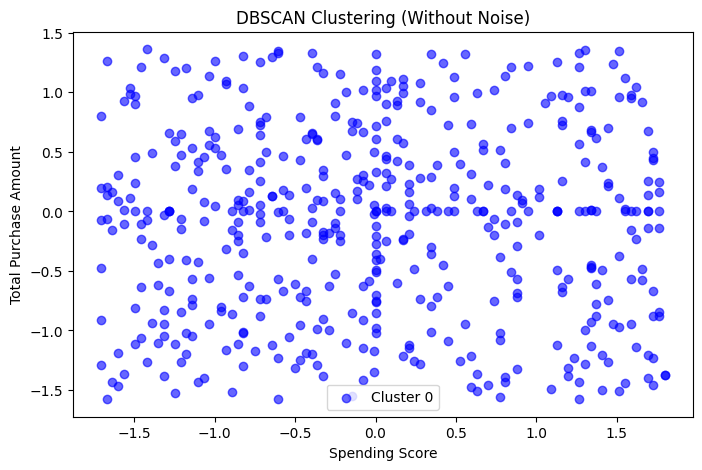

In [170]:
plt.figure(figsize=(8, 5))

for label in unique_labels:
    if label == -1:
        continue  # Skip noise points

    color = colors[label % len(colors)]
    cluster_points = df_clean[labels == label]
    plt.scatter(cluster_points["Spending_Score"], cluster_points["Total_Purchase_Amount"],
                c=color, label=f"Cluster {label}", alpha=0.6)

plt.xlabel("Spending Score")
plt.ylabel("Total Purchase Amount")
plt.title("DBSCAN Clustering (Without Noise)")
plt.legend()
plt.show()


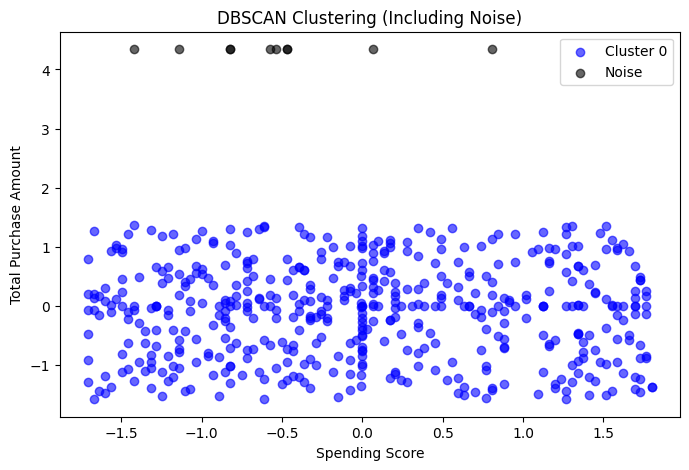

In [171]:
plt.figure(figsize=(8, 5))

for label in unique_labels:
    color = 'k' if label == -1 else colors[label % len(colors)]
    label_name = "Noise" if label == -1 else f"Cluster {label}"

    cluster_points = df_clean[labels == label]
    plt.scatter(cluster_points["Spending_Score"], cluster_points["Total_Purchase_Amount"],
                c=color, label=label_name, alpha=0.6)

plt.xlabel("Spending Score")
plt.ylabel("Total Purchase Amount")
plt.title("DBSCAN Clustering (Including Noise)")
plt.legend()
plt.show()


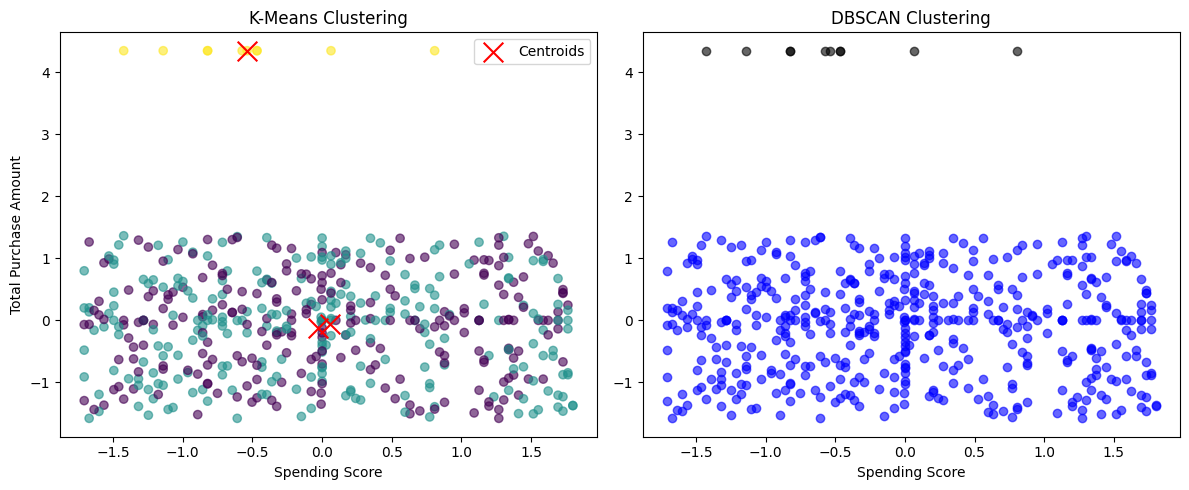

In [172]:
from sklearn.cluster import KMeans

# Run K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["KMeans_Cluster"] = kmeans.fit_predict(df_clean.iloc[:, :-1])  # Exclude DBSCAN column

# Plot K-Means vs. DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means Plot
axes[0].scatter(df_clean["Spending_Score"], df_clean["Total_Purchase_Amount"], 
                c=df_clean["KMeans_Cluster"], cmap="viridis", alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], 
                c="red", marker="x", s=200, label="Centroids")
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Spending Score")
axes[0].set_ylabel("Total Purchase Amount")
axes[0].legend()

# DBSCAN Plot
for label in unique_labels:
    color = 'k' if label == -1 else colors[label % len(colors)]
    cluster_points = df_clean[labels == label]
    axes[1].scatter(cluster_points["Spending_Score"], cluster_points["Total_Purchase_Amount"],
                    c=color, label=f"Cluster {label}", alpha=0.6)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("Spending Score")

plt.tight_layout()
plt.show()
